# Number detection

## first we fetch our pictures 

In [351]:
import os

def list_files(directory, label):
    a = []
    for filename in os.listdir(directory):
        joined = os.path.join(directory, filename)
        a.append((joined,label))
    return a
path = './numbers/'
f = os.listdir(path)
examples = []
for i in f:
    examples += list_files(path + i,i)

path = './Letters/'
f = os.listdir(path)
for i in f:
    examples += list_files(path + i,i)


### change color to gray

[ 9.  9.  9. ... 12. 12. 12.]
float32 0.0 1.0 (1734, 64, 60)
float32 0.0 24.0 (1734,)


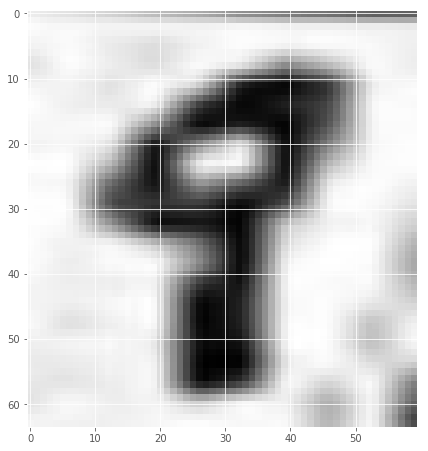

In [352]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_train = []
y_train = []

for path,label in examples :
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(180,192))
    x_train.append(image)
    y_train.append(label)
    
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train = x_train.astype(np.float32) / 255.
y_train = y_train.astype(np.float32)


In [353]:
from keras.utils import np_utils,to_categorical
y_train = np_utils.to_categorical(y_train).astype(np.float32)
#shuffle data
indices = np.arange(len(x_train))
temp_x = x_train
temp_y = y_train
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]



In [354]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical,get_source_inputs
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
x_train = np.expand_dims(x_train, axis=-1)
(trainX, testX, trainY, testY) = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

filters = 32
conv_size = 3
pool_size = 2
number_of_categories = 25
print(trainX.shape)
network = Sequential()
network.add(layers.Conv2D(filters,(conv_size,conv_size),activation="relu",input_shape=trainX.shape[1:]))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Conv2D(filters*2,(conv_size,conv_size),activation="relu",input_shape=trainX.shape[1:]))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Flatten())
network.add(Dense(256, activation='relu'))
network.add(Dense(32, activation='relu'))
network.add(Dense(number_of_categories, activation='softmax'))
# network.summary()

(1387, 64, 60, 1)


In [355]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [356]:
history = network.fit(trainX, trainY, epochs=5)

Epoch 1/5
1387/1387 [==============================] - 9s 7ms/step - loss: 1.5972 - acc: 0.6157
Epoch 2/5
1387/1387 [==============================] - 7s 5ms/step - loss: 0.2573 - acc: 0.9459
Epoch 3/5
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0819 - acc: 0.9776
Epoch 4/5
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0419 - acc: 0.9892
Epoch 5/5
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0090 - acc: 0.9986


In [357]:
score = network.evaluate(testX, testY)

print('Test score:', score[0])
print('Test accuracy:', score[1])

347/347 [==============================] - 1s 4ms/step
Test score: 0.0027521583186234386
Test accuracy: 1.0


dict_keys(['loss', 'acc'])


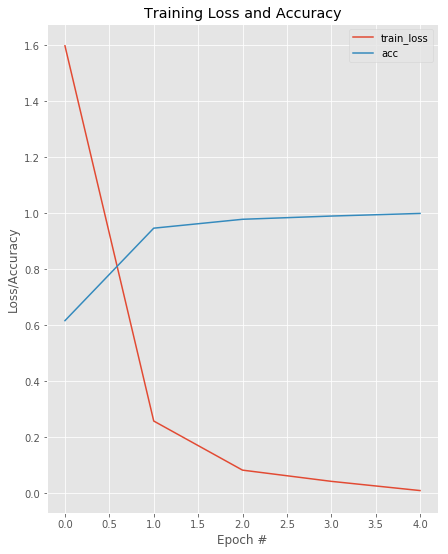

In [358]:
history_dict = history.history
print(history_dict.keys())

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["acc"], label="acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [389]:
predicted_classes = network.predict_classes(testX[78:79])


In [390]:
print(predicted_classes)
print(testY[78])


[14]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
